In [2]:
import tensorflow as tf
import os

In [6]:
path = r"C:\Users\aashutosh kumar\Downloads\Brain_Tumor\train"
os.listdir(path)

['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']

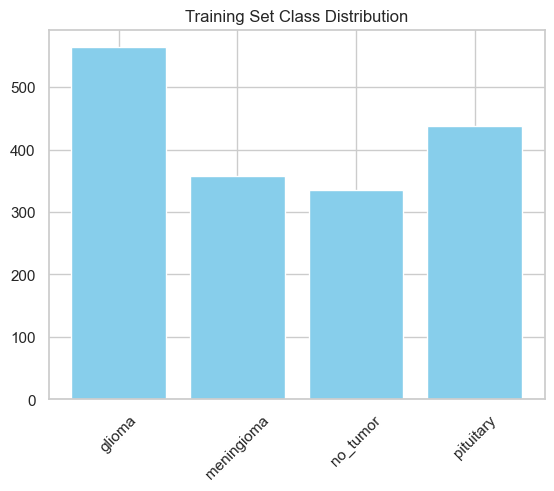

In [13]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

data_dir = r"C:\Users\aashutosh kumar\Downloads\Brain_Tumor\train"
class_names = os.listdir(data_dir)
class_names = [c for c in class_names if not c.endswith(".csv")]

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}

plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Training Set Class Distribution")
plt.xticks(rotation=45)
plt.show()


In [9]:
import cv2

shapes = []
for cls in class_names:
    img_path = os.path.join(data_dir, cls, os.listdir(os.path.join(data_dir, cls))[0])
    img = cv2.imread(img_path)
    shapes.append(img.shape)

print("Sample image shapes per class:", shapes)


Sample image shapes per class: [(640, 640, 3), (640, 640, 3), (640, 640, 3), (640, 640, 3)]


**DATA PREPROCESSING**

In [10]:
IMG_SIZE = (224, 224)

def preprocess_image(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # normalize to 0–1
    return img_array


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = r"C:\Users\aashutosh kumar\Downloads\Brain_Tumor\train"
val_path = r"C:\Users\aashutosh kumar\Downloads\Brain_Tumor\valid"
test_path = r"C:\Users\aashutosh kumar\Downloads\Brain_Tumor\test"

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_path, target_size=IMG_SIZE, class_mode='categorical')
val_gen = datagen.flow_from_directory(val_path, target_size=IMG_SIZE, class_mode='categorical')
test_gen = datagen.flow_from_directory(test_path, target_size=IMG_SIZE, class_mode='categorical')


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


**DATA AUGUMENTATION**

In [16]:
augmented_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

aug_train_gen = augmented_gen.flow_from_directory(train_path, target_size=IMG_SIZE, class_mode='categorical')


Found 1695 images belonging to 4 classes.


**MODEL TRAINING**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))

c:\a\envs\env2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
h = model.fit(aug_train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.5591 - loss: 1.0593

c:\a\envs\env2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 50s 949ms/step - accuracy: 0.5591 - loss: 1.0593 - val_accuracy: 0.6414 - val_loss: 0.8856
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 877ms/step - accuracy: 0.6396 - loss: 0.9464 - val_accuracy: 0.6514 - val_loss: 0.8410
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 820ms/step - accuracy: 0.6581 - loss: 0.9023 - val_accuracy: 0.5259 - val_loss: 1.2089
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 777ms/step - accuracy: 0.6592 - loss: 0.8627 - val_accuracy: 0.6892 - val_loss: 0.7955
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 761ms/step - accuracy: 0.7043 - loss: 0.8065 - val_accuracy: 0.6574 - val_loss: 0.7956
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 760ms/step - accuracy: 0.6387 - loss: 0.8880 - val_accuracy: 0.6056 - val_loss: 1.0335
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 755ms/step - accuracy: 0.6823 - loss: 0.8125 - val_accuracy: 0.6215 - val_loss: 1.0462
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 757ms/step - accuracy: 0.7122 - loss: 0.7860 - val_accuracy: 0.735

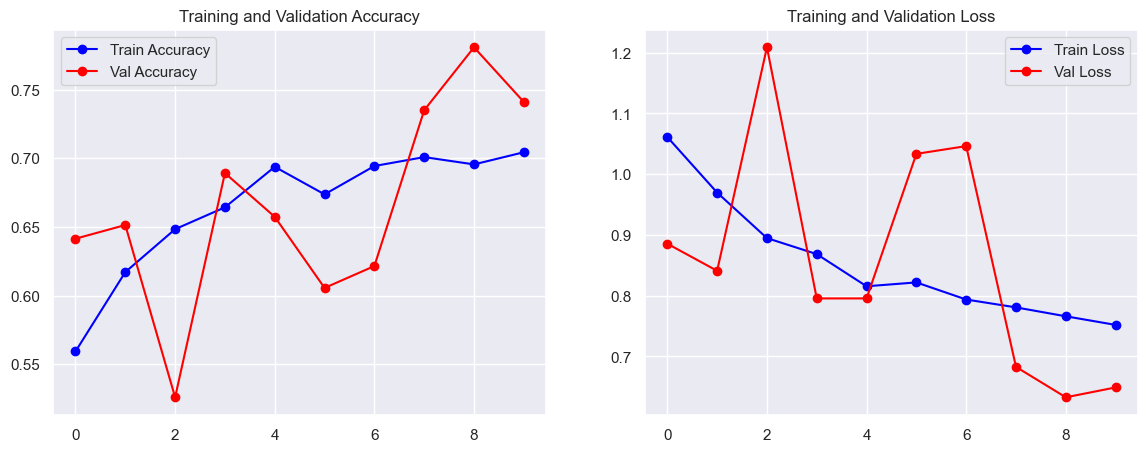

In [26]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs_range = range(len(acc))

sns.set(style="darkgrid")
# Plot
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o', color='blue')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='o', color='red')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o', color='blue')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='o', color='red')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: pituitary


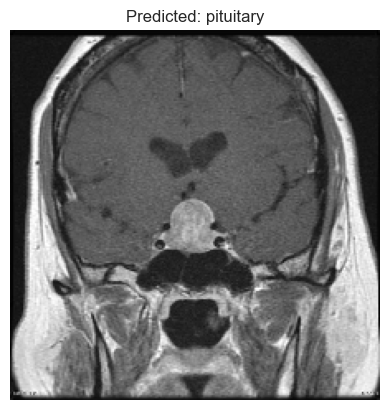

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

sample_class = 'pituitary'  
sample_image_path = os.path.join(test_path, sample_class, os.listdir(os.path.join(test_path, sample_class))[0])

# Preprocess
img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
class_indices = aug_train_gen.class_indices
class_labels = dict((v, k) for k, v in class_indices.items())

print(f"Predicted: {class_labels[predicted_class]}")

# Show image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()


In [27]:
model.save("brain_tumor_classifier_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [43]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
pretrained_model.trainable = False  


In [46]:
pretrained_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])


In [47]:
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
pretrained_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [48]:
h2 = pretrained_model.fit(aug_train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 751ms/step - accuracy: 0.5701 - loss: 1.0918 - val_accuracy: 0.7709 - val_loss: 0.5487
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 901ms/step - accuracy: 0.8012 - loss: 0.5278 - val_accuracy: 0.8307 - val_loss: 0.4634
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 872ms/step - accuracy: 0.8410 - loss: 0.4157 - val_accuracy: 0.7869 - val_loss: 0.5349
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 797ms/step - accuracy: 0.8622 - loss: 0.3631 - val_accuracy: 0.8406 - val_loss: 0.4322
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 626ms/step - accuracy: 0.8880 - loss: 0.3226 - val_accuracy: 0.8805 - val_loss: 0.3582
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 593ms/step - accuracy: 0.8846 - loss: 0.3153 - val_accuracy: 0.8307 - val_loss: 0.4578
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 588ms/step - accuracy: 0.8934 - loss: 0.3001 - val_accuracy: 0.8685 - val_loss: 0.3940
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 593ms/step - accuracy: 0.8937 - loss: 0.2791 - val_accu

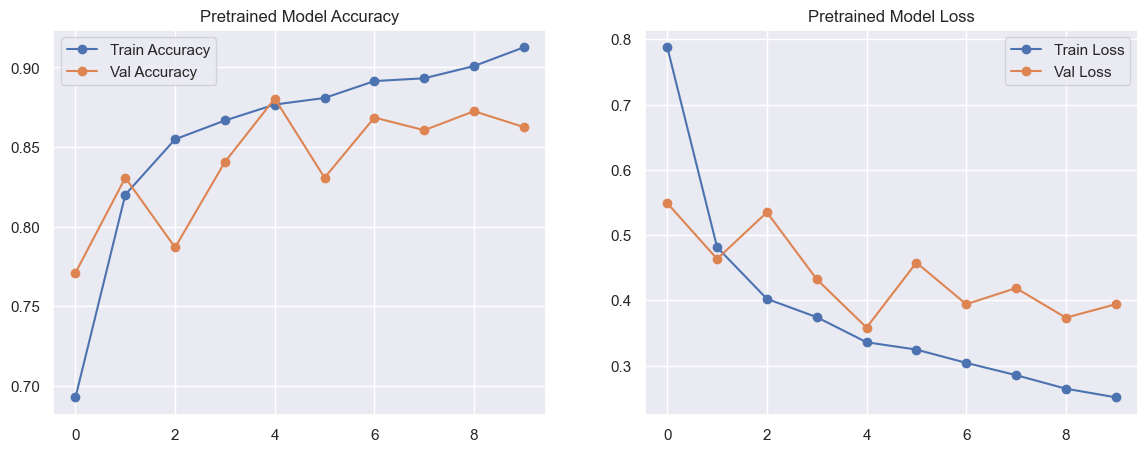

In [49]:
acc = h2.history['accuracy']
val_acc = h2.history['val_accuracy']
loss = h2.history['loss']
val_loss = h2.history['val_loss']
epochs_range = range(len(acc))

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='o')
plt.title('Pretrained Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='o')
plt.title('Pretrained Model Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted: no_tumor


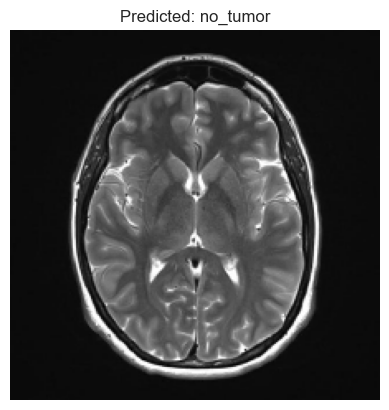

In [51]:
sample_class = 'no_tumor' 
sample_image_path = os.path.join(test_path, sample_class, os.listdir(os.path.join(test_path, sample_class))[0])

img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = pretrained_model.predict(img_array)
predicted_class = np.argmax(pred)
class_labels = dict((v, k) for k, v in aug_train_gen.class_indices.items())

print(f"Predicted: {class_labels[predicted_class]}")

# Display image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()


In [52]:
pretrained_model.save("brain_tumor_mobilenetv2_model.h5")
print("Pretrained MobileNetV2 model saved successfully!")

Pretrained MobileNetV2 model saved successfully!


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
def get_labels_and_predictions(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    return y_true, y_pred_classes


**EVALUATION OF CUSTOM CNN MODEL**

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step
Custom CNN Classification Report:
              precision    recall  f1-score   support

      glioma       0.32      0.30      0.31       161
  meningioma       0.29      0.15      0.19       124
    no_tumor       0.20      0.20      0.20        99
   pituitary       0.20      0.31      0.24       118

    accuracy                           0.25       502
   macro avg       0.25      0.24      0.24       502
weighted avg       0.26      0.25      0.24       502



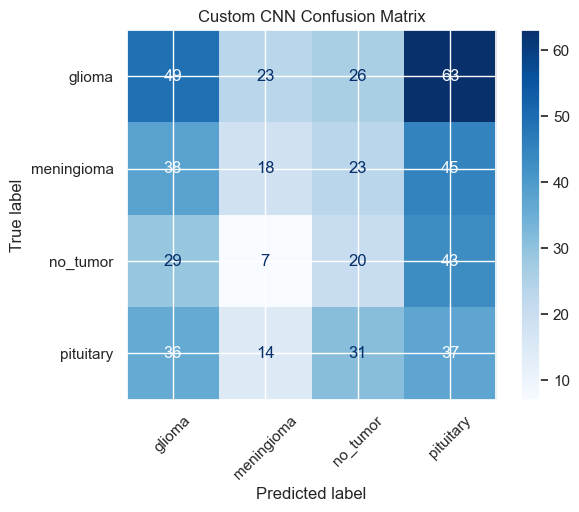

In [57]:
y_true_custom, y_pred_custom = get_labels_and_predictions(model, val_gen)

# Classification report
print("Custom CNN Classification Report:")
print(classification_report(y_true_custom, y_pred_custom, target_names=list(aug_train_gen.class_indices.keys())))

# Confusion matrix
cm = confusion_matrix(y_true_custom, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(aug_train_gen.class_indices.keys()))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Custom CNN Confusion Matrix")
plt.show()

**EVALUATION OF MOBILE-NET V2 MODEL**

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step
Pretrained MobileNetV2 Classification Report:
              precision    recall  f1-score   support

      glioma       0.33      0.35      0.34        80
  meningioma       0.28      0.21      0.24        63
    no_tumor       0.33      0.29      0.30        49
   pituitary       0.20      0.26      0.22        54

    accuracy                           0.28       246
   macro avg       0.28      0.28      0.28       246
weighted avg       0.29      0.28      0.28       246



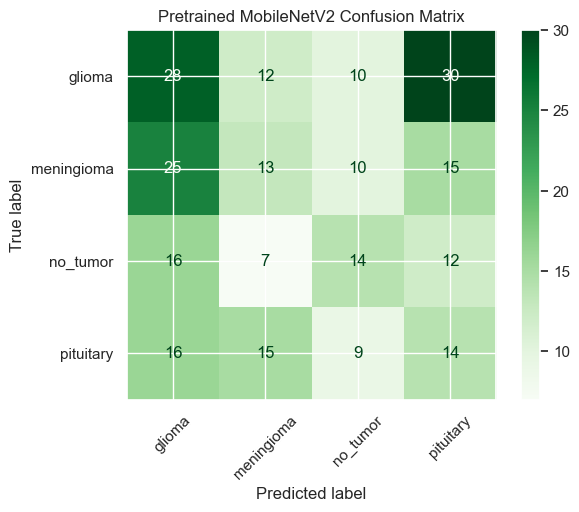

In [59]:
y_true_pretrained, y_pred_pretrained = get_labels_and_predictions(pretrained_model, test_gen)

# Classification report
print("Pretrained MobileNetV2 Classification Report:")
print(classification_report(y_true_pretrained, y_pred_pretrained, target_names=list(aug_train_gen.class_indices.keys())))

# Confusion matrix
cm2 = confusion_matrix(y_true_pretrained, y_pred_pretrained)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=list(aug_train_gen.class_indices.keys()))
disp2.plot(cmap="Greens", xticks_rotation=45)
plt.title("Pretrained MobileNetV2 Confusion Matrix")
plt.show()


In [60]:
# Unfreeze last few layers
base_model.trainable = True
for layer in base_model.layers[:-30]:  # freeze all but last 30 layers
    layer.trainable = False

# Compile again after changing trainable status
pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), 
                         loss='categorical_crossentropy', 
                         metrics=['accuracy'])

# Retrain
h_fine = pretrained_model.fit(
    aug_train_gen,
    validation_data=val_gen,
    epochs=5  # just a few more epochs
)


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 49s 780ms/step - accuracy: 0.4839 - loss: 1.7432 - val_accuracy: 0.8406 - val_loss: 0.4851
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 762ms/step - accuracy: 0.7671 - loss: 0.6841 - val_accuracy: 0.7948 - val_loss: 0.6875
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 788ms/step - accuracy: 0.8278 - loss: 0.5369 - val_accuracy: 0.8008 - val_loss: 0.6832
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 726ms/step - accuracy: 0.8557 - loss: 0.4164 - val_accuracy: 0.8227 - val_loss: 0.6036
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 684ms/step - accuracy: 0.8399 - loss: 0.4368 - val_accuracy: 0.8386 - val_loss: 0.5312


In [62]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen_2 = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    class_mode='categorical',
    shuffle=False  # Important for correct label order
)

loss, acc = pretrained_model.evaluate(test_gen_2)
print(f"Test Accuracy after fine-tuning: {acc * 100:.2f}%")

Found 246 images belonging to 4 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.8246 - loss: 0.5601
Test Accuracy after fine-tuning: 79.67%


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step
Fine-tuned MobileNetV2 Classification Report:
              precision    recall  f1-score   support

      glioma       0.72      0.99      0.84        80
  meningioma       0.96      0.37      0.53        63
    no_tumor       0.91      0.82      0.86        49
   pituitary       0.78      1.00      0.88        54

    accuracy                           0.80       246
   macro avg       0.84      0.79      0.78       246
weighted avg       0.83      0.80      0.77       246



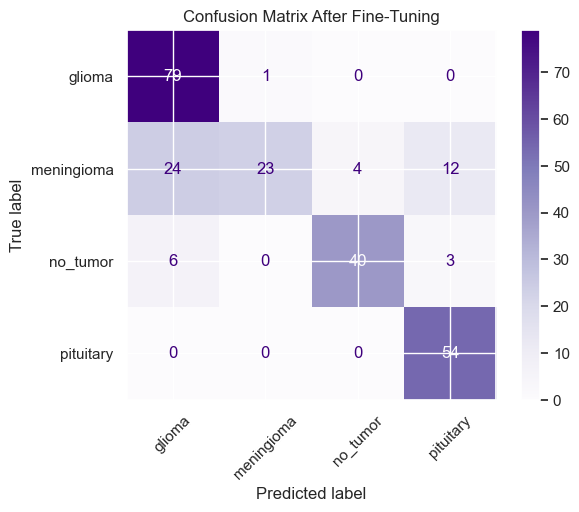

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true, y_pred_probs = test_gen.classes, pretrained_model.predict(test_gen_2)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = list(test_gen.class_indices.keys())

# Report
print("Fine-tuned MobileNetV2 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Purples", xticks_rotation=45)
plt.title("Confusion Matrix After Fine-Tuning")
plt.show()


In [ ]:
# Save the fine-tuned model in HDF5 format
pretrained_model.save("fine_tuned_mobilenetv2_brain_tumor.h5")
print("Fine-tuned MobileNetV2 model saved successfully as 'fine_tuned_mobilenetv2_brain_tumor.h5'")
